In [1]:
import os 
import pandas as pd
from pyCaLProblem import CaLProblem
from pyCaLPlant import Pinch_point_analyzer
import geatpy as ea
import numpy as np
import shutil
import proplot as pplot 

In [3]:
df_pEff=pd.read_csv("./plant_results.csv")
df_pEff.head()

,Unnamed: 0,m_cao_i,p_co2_storage,T_reaction,cao_conversion,p_reaction,expansion_ratio,T_co2_reactor_in,T_cao_reactor_in,T_co2_compressor_in,...,T_co2_storage_turbine_out,storage_turbine_power,T_co2_mix,conveying_power,hot_utility,cold_utility,cooling_power,total_auxiliary_power,total_net_power,plant_eff
0,Tcarb=775_X=0.2,1.38,7500000.0,775.0,0.2,446908.991688,4.228835,567.767736,759.995439,35.000000,...,75.736278,31581.942703,162.974998,-29768.571429,994.052043,4.591681e+05,-3673.345066,-33441.916495,336502.480770,0.383569
1,Tcarb=775_X=0.3,1.38,7500000.0,775.0,0.3,436900.928006,4.139225,569.723954,760.000000,35.003081,...,74.748418,47674.351728,161.106900,-30852.857143,950.320162,6.841057e+05,-5472.845331,-36325.702473,522133.052459,0.396776
2,Tcarb=775_X=0.4,1.38,7500000.0,775.0,0.4,436233.276238,4.132870,569.798805,759.951750,35.000000,...,74.584103,63574.196064,160.982788,-31937.142857,999.131380,9.095447e+05,-7276.357902,-39213.500759,707813.375397,0.403407
3,Tcarb=775_X=0.5,1.38,7500000.0,775.0,0.5,435927.885553,4.129837,569.806277,759.947904,35.000000,...,74.565397,79486.044180,160.931206,-33021.428571,987.115098,1.134981e+06,-9079.851875,-42101.280447,893459.500830,0.407371
4,Tcarb=825_X=0.2,1.38,7500000.0,825.0,0.2,487046.929976,4.614272,602.659557,809.944760,35.001913,...,79.881450,30843.306940,170.529215,-29768.571429,998.802216,4.441805e+05,-3553.443647,-33322.015075,356855.294602,0.406768


In [11]:
df_pEff_r=pd.read_csv("./plant_results_literature.csv")
df_pEff_r.head()

,Tcarb,X,eff
0,775,0.200,0.423
1,775,0.300,0.437
2,775,0.401,0.444
3,775,0.501,0.448
4,825,0.201,0.446


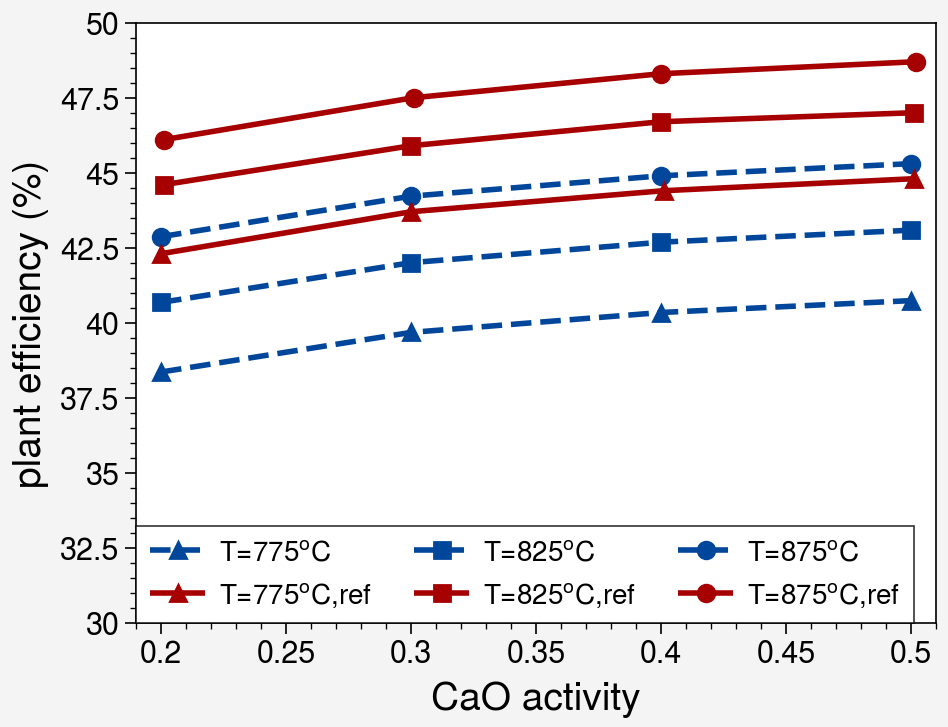

In [23]:

c1 = pplot.scale_luminance('cerulean', 0.5)
c2 = pplot.scale_luminance('red', 0.5)

with pplot.rc.context({'lines.linewidth': 2,"axes.labelsize":14,"tick.labelsize":11,
        "lines.marker":"o","lines.markersize":6,"legend.fontsize":10,"grid":False}):
    fig, ax = pplot.subplots(refaspect=(4, 3), axwidth=4,ncols=1, nrows=1, share=False)
    Tcarb=df_pEff["T_reaction"]
    X=df_pEff["cao_conversion"]
    pEff=df_pEff["plant_eff"]*100
    ax.plot(X[Tcarb==775].reset_index(drop=True),pEff[Tcarb==775].reset_index(drop=True),label="T=775$^o$C",linestyle="--",marker="^",color=c1)
    ax.plot(X[Tcarb==825].reset_index(drop=True),pEff[Tcarb==825].reset_index(drop=True),label="T=825$^o$C",linestyle="--",marker="s",color=c1)
    ax.plot(X[Tcarb==875].reset_index(drop=True),pEff[Tcarb==875].reset_index(drop=True),label="T=875$^o$C",linestyle="--",marker="o",color=c1)
    
    Tcarb_r=df_pEff_r["Tcarb"]
    X_r=df_pEff_r["X"]
    pEff_r=df_pEff_r["eff"]*100
    ax.plot(X_r[Tcarb_r==775].reset_index(drop=True),pEff_r[Tcarb_r==775].reset_index(drop=True),label="T=775$^o$C,ref",linestyle="-",marker="^",color=c2)
    ax.plot(X_r[Tcarb_r==825].reset_index(drop=True),pEff_r[Tcarb_r==825].reset_index(drop=True),label="T=825$^o$C,ref",linestyle="-",marker="s",color=c2)
    ax.plot(X_r[Tcarb_r==875].reset_index(drop=True),pEff_r[Tcarb_r==875].reset_index(drop=True),label="T=875$^o$C,ref",linestyle="-",marker="o",color=c2)

    
    ax.format(xlabel="CaO activity",ylabel="plant efficiency (%)")
    ax.set_xlim([0.19,0.51])
    ax.set_ylim([30,50])
    ax.legend()
    fig.savefig("plant_efficiency_comparisons.jpg",bbox_inches='tight')


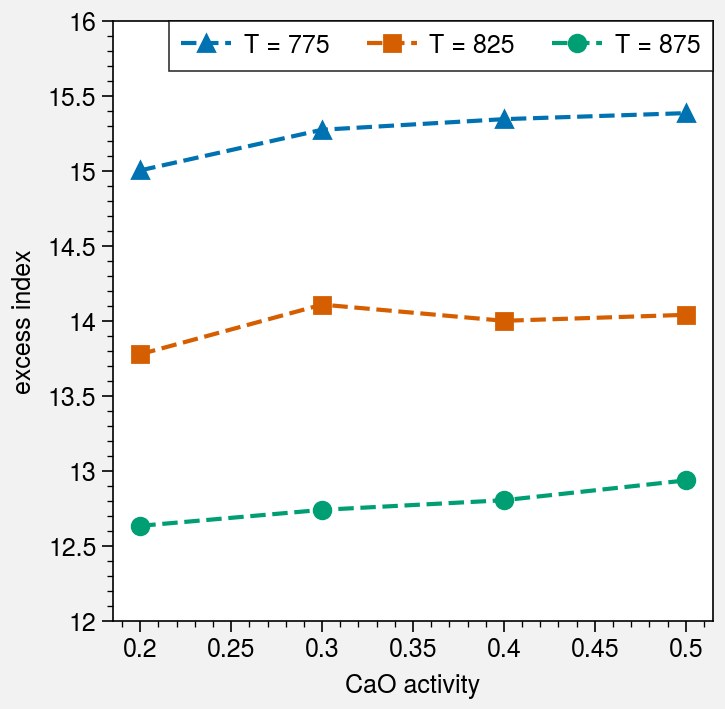

In [31]:
with pplot.rc.context({"grid": False}):
    fig, ax = pplot.subplots(aspect=(1, 1), axwidth=3)
    Tcarb=df_pEff["T_reaction"]
    X=df_pEff["cao_conversion"]
    excess_index=df_pEff["excess_index"]
    ax.plot(X[Tcarb==775].reset_index(drop=True),excess_index[Tcarb==775].reset_index(drop=True),label="T = 775",linestyle="--",marker="^")
    ax.plot(X[Tcarb==825].reset_index(drop=True),excess_index[Tcarb==825].reset_index(drop=True),label="T = 825",linestyle="--",marker="s")
    ax.plot(X[Tcarb==875].reset_index(drop=True),excess_index[Tcarb==875].reset_index(drop=True),label="T = 875",linestyle="--",marker="o")
    ax.format(xlabel="CaO activity",ylabel="excess index")
    ax.set_ylim([12,16])
    ax.legend(loc="best")
    fig.savefig("excess_index.jpg",bbox_inches='tight')


In [2]:
import os
import sys
# CaLRepo = os.environ.get("CaLRepo")
CaLRepo ='/home/anoldfriend/Workspace/MyRepo/thermodynamics/CaL'
# print(CaLRepo)
sys.path.append(f"{CaLRepo}/utilities/")
from pyPinch import PyPinch


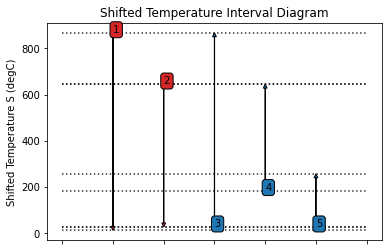

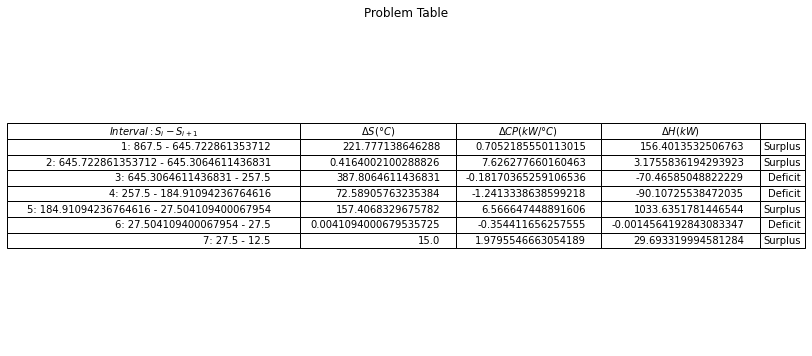

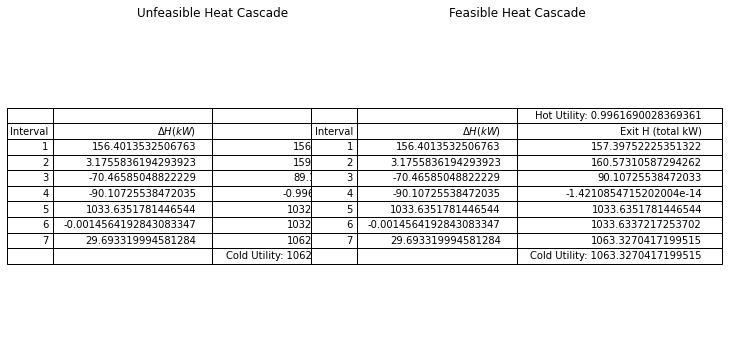

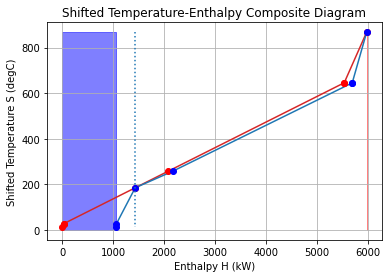

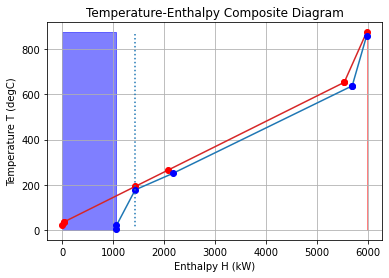

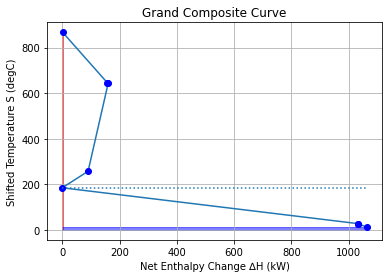

In [4]:
options = {'draw'}
pinch = PyPinch('./ppa_results/Tcarb=875_X=0.5.csv', options)
pinch.solve()

solving the case: Tcarb = 775, X = 0.2
case_id: Tcarb=775_X=0.2
gen|  eval  |    f_opt    |    f_max    |    f_avg    |    f_min    |    f_std    
----------------------------------------------------------------------------------
 0 |   60   | 2.84466E-01 | 2.84466E-01 | 1.09096E-01 | 2.67011E-02 | 6.86506E-02 
 1 |  120   | 2.84466E-01 | 2.84466E-01 | 1.13393E-01 | 9.76538E-03 | 8.03276E-02 
 2 |  180   | 3.54479E-01 | 3.54479E-01 | 1.33661E-01 | 9.76538E-03 | 8.89098E-02 
 3 |  240   | 3.54479E-01 | 3.54479E-01 | 1.57075E-01 | 1.09594E-02 | 9.04850E-02 
 4 |  300   | 3.54479E-01 | 3.54479E-01 | 1.64370E-01 | 1.09594E-02 | 8.74392E-02 
 5 |  360   | 3.54479E-01 | 3.54479E-01 | 1.72296E-01 | 1.09594E-02 | 8.64265E-02 
 6 |  420   | 3.54479E-01 | 3.54479E-01 | 1.93767E-01 | 2.58156E-02 | 8.80505E-02 
 7 |  480   | 3.54479E-01 | 3.54479E-01 | 2.13194E-01 | 2.58156E-02 | 8.77158E-02 
 8 |  540   | 3.59289E-01 | 3.59289E-01 | 2.23913E-01 | 2.88295E-02 | 8.28285E-02 
 9 |  600   | 3.59289E-

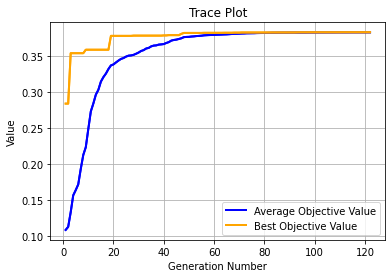

Execution time: 131.18934965133667 s
Evaluation number: 7320
The best objective value is: 0.3835688311980328
The best variables are: 
446908.9916884208	4.228835122582633	567.7677357520826	759.9954387346756	35.0	250.0	


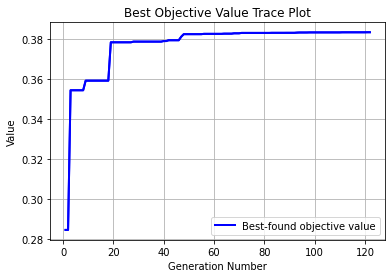

{'success': True, 'stopMsg': 'The algotirhm stepped because it exceeded the trapped count limit.', 'optPop': <geatpy.Population.Population object at 0x7f75d15b23d0>, 'lastPop': <geatpy.Population.Population object at 0x7f75d15b28e0>, 'Vars': array([[4.46908992e+05, 4.22883512e+00, 5.67767736e+02, 7.59995439e+02,
        3.50000000e+01, 2.50000000e+02]]), 'ObjV': array([[0.38356883]]), 'CV': array([[  -5.94795679, -129.0930503 ]]), 'executeTime': 131.18934965133667, 'nfev': 7320, 'startTime': '2022-04-24 22h-56m-55s', 'endTime': '2022-04-24 22h-59m-07s'}
solving the case: Tcarb = 775, X = 0.3
case_id: Tcarb=775_X=0.3
gen|  eval  |    f_opt    |    f_max    |    f_avg    |    f_min    |    f_std    
----------------------------------------------------------------------------------
 0 |   60   | 2.79965E-01 | 2.79965E-01 | 1.13603E-01 | 4.32665E-02 | 5.57013E-02 
 1 |  120   | 3.31424E-01 | 3.31424E-01 | 1.41978E-01 | 1.34796E-02 | 8.57965E-02 
 2 |  180   | 3.31424E-01 | 3.31424E-01 | 1.

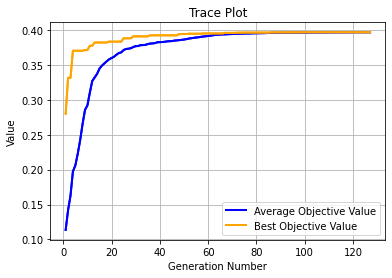

Execution time: 139.87809205055237 s
Evaluation number: 7620
The best objective value is: 0.3967756081198437
The best variables are: 
436900.92800610233	4.139224919763343	569.7239544350475	760.0	35.00308118983462	250.11207067324597	


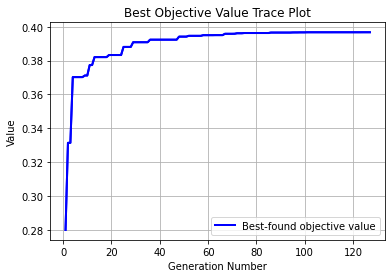

{'success': True, 'stopMsg': 'The algotirhm stepped because it exceeded the trapped count limit.', 'optPop': <geatpy.Population.Population object at 0x7f75ce981c70>, 'lastPop': <geatpy.Population.Population object at 0x7f75ce9810d0>, 'Vars': array([[4.36900928e+05, 4.13922492e+00, 5.69723954e+02, 7.60000000e+02,
        3.50030812e+01, 2.50112071e+02]]), 'ObjV': array([[0.39677561]]), 'CV': array([[-49.67983826,  -4.33073611]]), 'executeTime': 139.87809205055237, 'nfev': 7620, 'startTime': '2022-04-24 22h-59m-08s', 'endTime': '2022-04-24 23h-01m-28s'}
solving the case: Tcarb = 775, X = 0.4
case_id: Tcarb=775_X=0.4
gen|  eval  |    f_opt    |    f_max    |    f_avg    |    f_min    |    f_std    
----------------------------------------------------------------------------------
 0 |   60   | 2.97439E-01 | 2.97439E-01 | 1.25548E-01 | 5.15491E-02 | 5.84084E-02 
 1 |  120   | 3.37880E-01 | 3.37880E-01 | 1.46947E-01 | 1.66417E-02 | 8.56217E-02 
 2 |  180   | 3.37880E-01 | 3.37880E-01 | 1.66

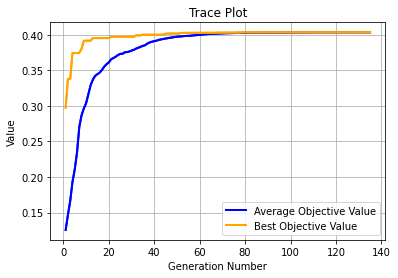

Execution time: 142.75912046432495 s
Evaluation number: 8100
The best objective value is: 0.403407351539591
The best variables are: 
436233.2762378347	4.132869794094627	569.7988053690946	759.9517496820706	35.0	250.0004912684753	


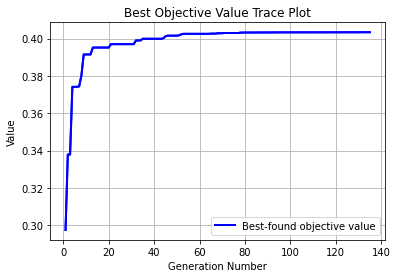

{'success': True, 'stopMsg': 'The algotirhm stepped because it exceeded the trapped count limit.', 'optPop': <geatpy.Population.Population object at 0x7f75d126f940>, 'lastPop': <geatpy.Population.Population object at 0x7f75d1241430>, 'Vars': array([[4.36233276e+05, 4.13286979e+00, 5.69798805e+02, 7.59951750e+02,
        3.50000000e+01, 2.50000491e+02]]), 'ObjV': array([[0.40340735]]), 'CV': array([[-0.86861965, -5.06023725]]), 'executeTime': 142.75912046432495, 'nfev': 8100, 'startTime': '2022-04-24 23h-01m-29s', 'endTime': '2022-04-24 23h-03m-52s'}
solving the case: Tcarb = 775, X = 0.5
case_id: Tcarb=775_X=0.5
gen|  eval  |    f_opt    |    f_max    |    f_avg    |    f_min    |    f_std    
----------------------------------------------------------------------------------
 0 |   60   | 3.07924E-01 | 3.07924E-01 | 1.32716E-01 | 5.65187E-02 | 6.02434E-02 
 1 |  120   | 3.41754E-01 | 3.41754E-01 | 1.48223E-01 | 1.85389E-02 | 8.74194E-02 
 2 |  180   | 3.41754E-01 | 3.41754E-01 | 1.8018

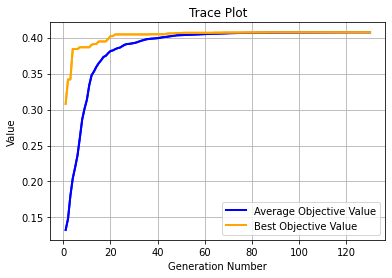

Execution time: 132.7810719013214 s
Evaluation number: 7800
The best objective value is: 0.407370805317759
The best variables are: 
435927.88555340184	4.129836536026319	569.8062772085848	759.9479039435527	35.0	250.0182779979443	


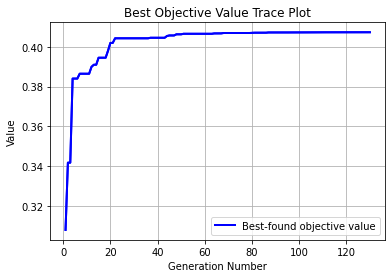

{'success': True, 'stopMsg': 'The algotirhm stepped because it exceeded the trapped count limit.', 'optPop': <geatpy.Population.Population object at 0x7f75cee00bb0>, 'lastPop': <geatpy.Population.Population object at 0x7f75d17cc520>, 'Vars': array([[4.35927886e+05, 4.12983654e+00, 5.69806277e+02, 7.59947904e+02,
        3.50000000e+01, 2.50018278e+02]]), 'ObjV': array([[0.40737081]]), 'CV': array([[-12.88490164,  -8.49503802]]), 'executeTime': 132.7810719013214, 'nfev': 7800, 'startTime': '2022-04-24 23h-03m-53s', 'endTime': '2022-04-24 23h-06m-06s'}
solving the case: Tcarb = 825, X = 0.2
case_id: Tcarb=825_X=0.2
gen|  eval  |    f_opt    |    f_max    |    f_avg    |    f_min    |    f_std    
----------------------------------------------------------------------------------
 0 |   60   | 2.61204E-01 | 2.61204E-01 | 1.09397E-01 | 2.61640E-02 | 6.84596E-02 
 1 |  120   | 2.79720E-01 | 2.79720E-01 | 1.10444E-01 | 6.73271E-03 | 7.68016E-02 
 2 |  180   | 3.44910E-01 | 3.44910E-01 | 1.540

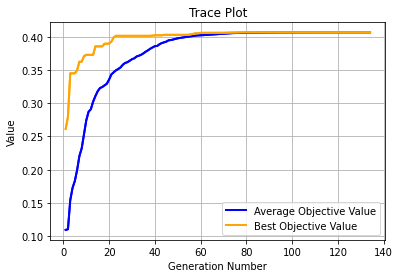

Execution time: 136.82827758789062 s
Evaluation number: 8040
The best objective value is: 0.4067683778867585
The best variables are: 
487046.9299756683	4.614271923943237	602.6595566604652	809.9447604651683	35.00191324708315	250.0000915791152	


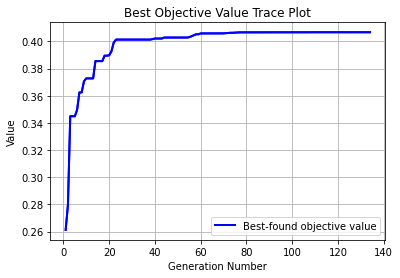

{'success': True, 'stopMsg': 'The algotirhm stepped because it exceeded the trapped count limit.', 'optPop': <geatpy.Population.Population object at 0x7f75cee05a90>, 'lastPop': <geatpy.Population.Population object at 0x7f75db507820>, 'Vars': array([[4.87046930e+05, 4.61427192e+00, 6.02659557e+02, 8.09944760e+02,
        3.50019132e+01, 2.50000092e+02]]), 'ObjV': array([[0.40676838]]), 'CV': array([[-1.19778443, -5.190436  ]]), 'executeTime': 136.82827758789062, 'nfev': 8040, 'startTime': '2022-04-24 23h-06m-06s', 'endTime': '2022-04-24 23h-08m-24s'}
solving the case: Tcarb = 825, X = 0.3
case_id: Tcarb=825_X=0.3
gen|  eval  |    f_opt    |    f_max    |    f_avg    |    f_min    |    f_std    
----------------------------------------------------------------------------------
 0 |   60   | 3.69954E-01 | 3.69954E-01 | 1.34305E-01 | 4.58698E-02 | 8.21059E-02 
 1 |  120   | 3.69954E-01 | 3.69954E-01 | 1.33970E-01 | 2.58269E-02 | 9.23896E-02 
 2 |  180   | 3.90426E-01 | 3.90426E-01 | 1.5906

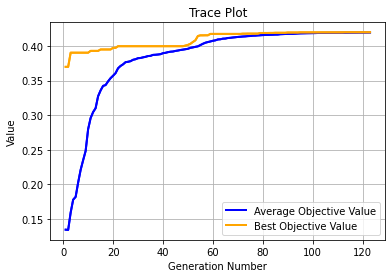

Execution time: 125.8936014175415 s
Evaluation number: 7380
The best objective value is: 0.42002208215168013
The best variables are: 
470933.1990032661	4.451514090370038	606.1339047311287	809.5868638396532	35.01781951452535	250.00101326888324	


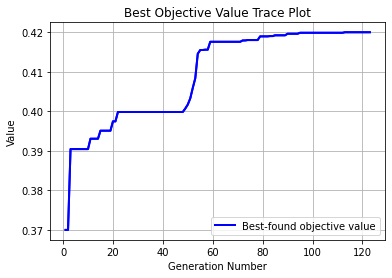

{'success': True, 'stopMsg': 'The algotirhm stepped because it exceeded the trapped count limit.', 'optPop': <geatpy.Population.Population object at 0x7f75db566bb0>, 'lastPop': <geatpy.Population.Population object at 0x7f75d39a8430>, 'Vars': array([[4.70933199e+05, 4.45151409e+00, 6.06133905e+02, 8.09586864e+02,
        3.50178195e+01, 2.50001013e+02]]), 'ObjV': array([[0.42002208]]), 'CV': array([[-164.06629616, -235.02246992]]), 'executeTime': 125.8936014175415, 'nfev': 7380, 'startTime': '2022-04-24 23h-08m-24s', 'endTime': '2022-04-24 23h-10m-31s'}
solving the case: Tcarb = 825, X = 0.4
case_id: Tcarb=825_X=0.4
gen|  eval  |    f_opt    |    f_max    |    f_avg    |    f_min    |    f_std    
----------------------------------------------------------------------------------
 0 |   60   | 3.10212E-01 | 3.10212E-01 | 1.33531E-01 | 5.57226E-02 | 6.16344E-02 
 1 |  120   | 3.50034E-01 | 3.50034E-01 | 1.62060E-01 | 2.18669E-02 | 9.26221E-02 
 2 |  180   | 3.62806E-01 | 3.62806E-01 | 1.8

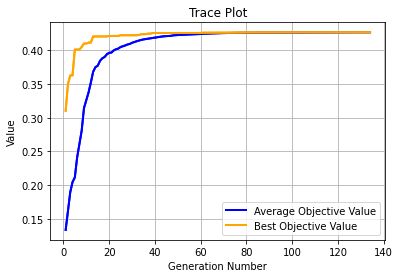

Execution time: 140.357919216156 s
Evaluation number: 8040
The best objective value is: 0.42683864075442635
The best variables are: 
482309.7218531832	4.566580443019832	603.3051775894639	809.9722436758123	35.0	250.00124643403427	


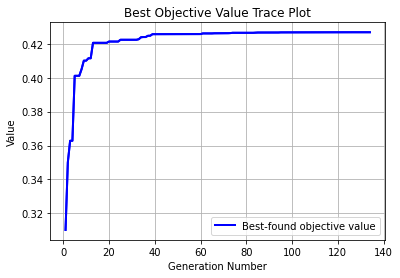

{'success': True, 'stopMsg': 'The algotirhm stepped because it exceeded the trapped count limit.', 'optPop': <geatpy.Population.Population object at 0x7f75db1c0c70>, 'lastPop': <geatpy.Population.Population object at 0x7f75db1c0be0>, 'Vars': array([[4.82309722e+05, 4.56658044e+00, 6.03305178e+02, 8.09972244e+02,
        3.50000000e+01, 2.50001246e+02]]), 'ObjV': array([[0.42683864]]), 'CV': array([[ -4.38663123, -67.57125905]]), 'executeTime': 140.357919216156, 'nfev': 8040, 'startTime': '2022-04-24 23h-10m-32s', 'endTime': '2022-04-24 23h-12m-53s'}
solving the case: Tcarb = 825, X = 0.5
case_id: Tcarb=825_X=0.5
gen|  eval  |    f_opt    |    f_max    |    f_avg    |    f_min    |    f_std    
----------------------------------------------------------------------------------
 0 |   60   | 3.22175E-01 | 3.22175E-01 | 1.41903E-01 | 6.11623E-02 | 6.35275E-02 
 1 |  120   | 3.53949E-01 | 3.53949E-01 | 1.63096E-01 | 2.42580E-02 | 9.11604E-02 
 2 |  180   | 3.66950E-01 | 3.66950E-01 | 1.8938

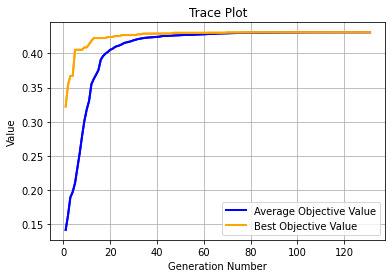

Execution time: 137.07946705818176 s
Evaluation number: 7860
The best objective value is: 0.43085785932892534
The best variables are: 
481377.2016061194	4.560686272922183	603.3535231223418	810.0	35.0	250.0	


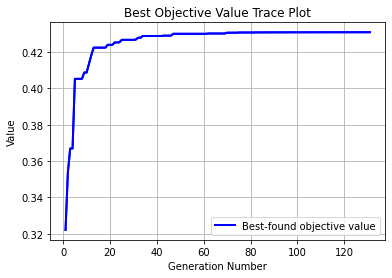

{'success': True, 'stopMsg': 'The algotirhm stepped because it exceeded the trapped count limit.', 'optPop': <geatpy.Population.Population object at 0x7f75d3d74130>, 'lastPop': <geatpy.Population.Population object at 0x7f75d8a9cca0>, 'Vars': array([[4.81377202e+05, 4.56068627e+00, 6.03353523e+02, 8.10000000e+02,
        3.50000000e+01, 2.50000000e+02]]), 'ObjV': array([[0.43085786]]), 'CV': array([[-18.95084913,  -2.31915493]]), 'executeTime': 137.07946705818176, 'nfev': 7860, 'startTime': '2022-04-24 23h-12m-53s', 'endTime': '2022-04-24 23h-15m-11s'}
solving the case: Tcarb = 875, X = 0.2
case_id: Tcarb=875_X=0.2
gen|  eval  |    f_opt    |    f_max    |    f_avg    |    f_min    |    f_std    
----------------------------------------------------------------------------------
 0 |   60   | 2.52116E-01 | 2.52116E-01 | 1.06484E-01 | 2.38902E-02 | 6.86195E-02 
 1 |  120   | 3.40226E-01 | 3.40226E-01 | 1.30042E-01 | 1.12373E-02 | 8.58377E-02 
 2 |  180   | 3.95147E-01 | 3.95147E-01 | 1.70

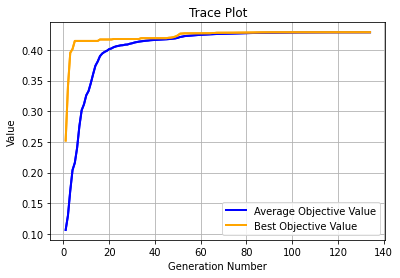

Execution time: 137.80250668525696 s
Evaluation number: 8040
The best objective value is: 0.42868305239962784
The best variables are: 
539817.3678548139	5.112436850136673	635.9106622563856	860.0	35.0	250.00121535874567	


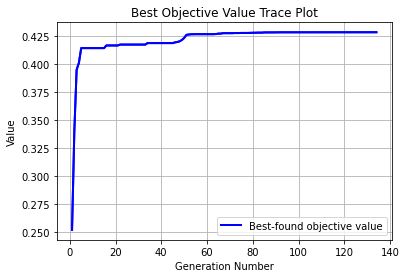

{'success': True, 'stopMsg': 'The algotirhm stepped because it exceeded the trapped count limit.', 'optPop': <geatpy.Population.Population object at 0x7f75d8965580>, 'lastPop': <geatpy.Population.Population object at 0x7f75dd819850>, 'Vars': array([[5.39817368e+05, 5.11243685e+00, 6.35910662e+02, 8.60000000e+02,
        3.50000000e+01, 2.50001215e+02]]), 'ObjV': array([[0.42868305]]), 'CV': array([[ -3.75904797, -40.49131688]]), 'executeTime': 137.80250668525696, 'nfev': 8040, 'startTime': '2022-04-24 23h-15m-11s', 'endTime': '2022-04-24 23h-17m-30s'}
solving the case: Tcarb = 875, X = 0.3
case_id: Tcarb=875_X=0.3
gen|  eval  |    f_opt    |    f_max    |    f_avg    |    f_min    |    f_std    
----------------------------------------------------------------------------------
 0 |   60   | 3.56343E-01 | 3.56343E-01 | 1.45013E-01 | 4.68816E-02 | 8.59737E-02 
 1 |  120   | 3.56343E-01 | 3.56343E-01 | 1.51751E-01 | 2.98962E-02 | 1.02058E-01 
 2 |  180   | 3.93016E-01 | 3.93016E-01 | 1.73

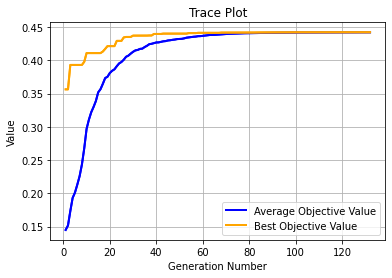

Execution time: 135.37697315216064 s
Evaluation number: 7920
The best objective value is: 0.44217877686714147
The best variables are: 
539289.6683561857	5.101540690802598	635.8581497208904	859.7635470211868	35.00310538009592	250.0	


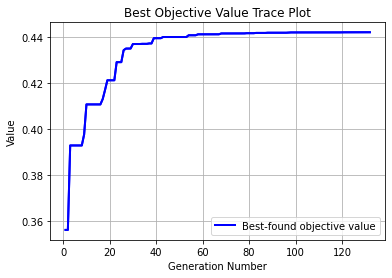

{'success': True, 'stopMsg': 'The algotirhm stepped because it exceeded the trapped count limit.', 'optPop': <geatpy.Population.Population object at 0x7f75d39ba640>, 'lastPop': <geatpy.Population.Population object at 0x7f75d3cca130>, 'Vars': array([[5.39289668e+05, 5.10154069e+00, 6.35858150e+02, 8.59763547e+02,
        3.50031054e+01, 2.50000000e+02]]), 'ObjV': array([[0.44217878]]), 'CV': array([[ -25.4640951 , -157.69179844]]), 'executeTime': 135.37697315216064, 'nfev': 7920, 'startTime': '2022-04-24 23h-17m-30s', 'endTime': '2022-04-24 23h-19m-47s'}
solving the case: Tcarb = 875, X = 0.4
case_id: Tcarb=875_X=0.4
gen|  eval  |    f_opt    |    f_max    |    f_avg    |    f_min    |    f_std    
----------------------------------------------------------------------------------
 0 |   60   | 3.19535E-01 | 3.19535E-01 | 1.39145E-01 | 5.71108E-02 | 6.45681E-02 
 1 |  120   | 3.59987E-01 | 3.59987E-01 | 1.68206E-01 | 2.58562E-02 | 9.52204E-02 
 2 |  180   | 4.15679E-01 | 4.15679E-01 | 2.

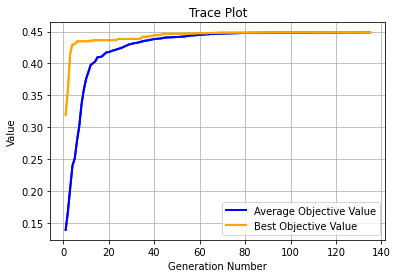

Execution time: 139.93059158325195 s
Evaluation number: 8100
The best objective value is: 0.44897504575912117
The best variables are: 
536867.0989031227	5.0864239631513435	635.9438795990212	859.9737342538564	35.00003540650898	250.04780078838027	


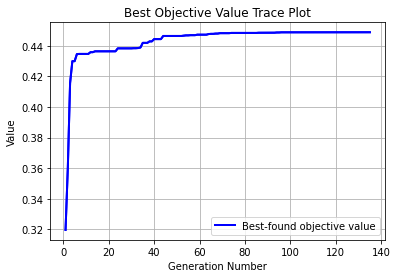

{'success': True, 'stopMsg': 'The algotirhm stepped because it exceeded the trapped count limit.', 'optPop': <geatpy.Population.Population object at 0x7f75cee078e0>, 'lastPop': <geatpy.Population.Population object at 0x7f75d39dbe20>, 'Vars': array([[5.36867099e+05, 5.08642396e+00, 6.35943880e+02, 8.59973734e+02,
        3.50000354e+01, 2.50047801e+02]]), 'ObjV': array([[0.44897505]]), 'CV': array([[-5.20029169, -2.06567144]]), 'executeTime': 139.93059158325195, 'nfev': 8100, 'startTime': '2022-04-24 23h-19m-47s', 'endTime': '2022-04-24 23h-22m-08s'}
solving the case: Tcarb = 875, X = 0.5
case_id: Tcarb=875_X=0.5
gen|  eval  |    f_opt    |    f_max    |    f_avg    |    f_min    |    f_std    
----------------------------------------------------------------------------------
 0 |   60   | 3.33019E-01 | 3.33019E-01 | 1.48766E-01 | 6.20865E-02 | 6.65263E-02 
 1 |  120   | 3.63939E-01 | 3.63939E-01 | 1.77199E-01 | 2.87800E-02 | 9.83050E-02 
 2 |  180   | 4.19785E-01 | 4.19785E-01 | 2.1246

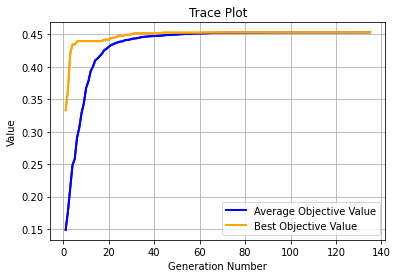

Execution time: 142.00577878952026 s
Evaluation number: 8100
The best objective value is: 0.4530321499744578
The best variables are: 
526860.1809004117	4.990001149893559	637.8064611436831	860.0	35.004109400067954	250.0	


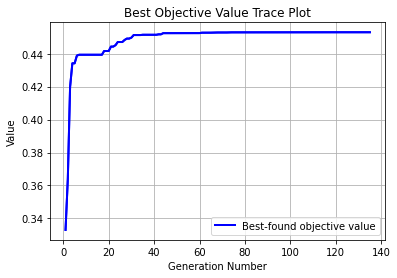

{'success': True, 'stopMsg': 'The algotirhm stepped because it exceeded the trapped count limit.', 'optPop': <geatpy.Population.Population object at 0x7f75ceda65b0>, 'lastPop': <geatpy.Population.Population object at 0x7f75ced88610>, 'Vars': array([[5.26860181e+05, 4.99000115e+00, 6.37806461e+02, 8.60000000e+02,
        3.50041094e+01, 2.50000000e+02]]), 'ObjV': array([[0.45303215]]), 'CV': array([[ -4.24383024, -34.85112452]]), 'executeTime': 142.00577878952026, 'nfev': 8100, 'startTime': '2022-04-24 23h-22m-08s', 'endTime': '2022-04-24 23h-24m-31s'}


In [37]:
# 实例化问题对象
Tcarbs=[775,825,875]
cao_conversions=[0.2,0.3,0.4,0.5]
# Tcarbs=[775]
# cao_conversions=[0.2,0.3]
all_plant_results={}
all_best_variables={}
pinch_point_analysis_folder="./ppa_results"
convergence_plots_folder="./convergence_plots"
folders=[pinch_point_analysis_folder,convergence_plots_folder]
for folder in folders:
    if not os.path.exists(folder):
        os.mkdir(folder)
    else:
        shutil.rmtree(folder)
        os.mkdir(folder)

for Tcarb in Tcarbs:
    for X in cao_conversions:
        print(f"solving the case: Tcarb = {Tcarb}, X = {X}")
        case_id=f"Tcarb={Tcarb}_X={X}"
        print(f"case_id: {case_id}")
        parameters={}
        parameters["T_reaction"]=Tcarb
        parameters["m_cao_i"]=1.38
        parameters["p_co2_storage"]=75e5
        parameters["cao_conversion"]=X
        problem = CaLProblem(parameters)
        algorithm = ea.soea_DE_currentToBest_1_bin_templet(problem,
                                        ea.Population(Encoding='RI', NIND=60),
                                        MAXGEN=200,  # 最大进化代数。
                                        logTras=1, #,  # 表示每隔多少代记录一次日志信息，0表示不记录。
                                        trappedValue=1e-6,  # 单目标优化陷入停滞的判断阈值。
                                        maxTrappedCount=100)  # # 进化停滞计数器最大上限值。
        algorithm.mutOper.F=0.95 #变异概率
        algorithm.recOper.XOVR = 0.95  # 重组概率

        # 求解
        res = ea.optimize(algorithm, seed=1, verbose=True, drawing=1, outputMsg=True, drawLog=True, saveFlag=False)
        print(res)
        best_vars=res["Vars"]
        all_best_variables[case_id]=best_vars[0]

        # copy the trace plot to folder
        shutil.copyfile("./Trace Plot.svg",f"{convergence_plots_folder}/{case_id}.svg")
        
        # solve the plant status with the best choice   
        input={}
        input["m_cao_i"] = parameters["m_cao_i"]
        input["p_co2_storage"] = parameters["p_co2_storage"]
        input["T_reaction"] = parameters["T_reaction"]
        input["cao_conversion"]=parameters["cao_conversion"]
        input["p_reaction"]=best_vars[0,0]
        input["expansion_ratio"]=best_vars[0,1]
        input["T_co2_reactor_in"]=best_vars[0,2]
        input["T_cao_reactor_in"]=best_vars[0,3]
        input["T_co2_compressor_in"]=best_vars[0,4]
        input["T_co2_storage_turbine_in"]=best_vars[0,5]
        plant_results=problem._plant.solve(input)
        all_plant_results[case_id]=plant_results

        # save csv files for pinch point analysis
        ppa=Pinch_point_analyzer(plant_results)
        ppa.write_pyPinch_data_csv(f"{pinch_point_analysis_folder}/{case_id}.csv")
        
df_plant_results=pd.DataFrame(all_plant_results).T
df_plant_results.to_csv("plant_results.csv")

df_best_variables=pd.DataFrame(all_best_variables,index=["p_reaction","expansion_ratio",
    "T_co2_reactor_in","T_cao_reactor_in","T_co2_compressor_in","T_co2_storage_turbine_in"]).T
df_best_variables.to_csv("best_variables.csv")

